# 1 - Introdução do que faremos

## 1.1 - Introdução ao Projeto

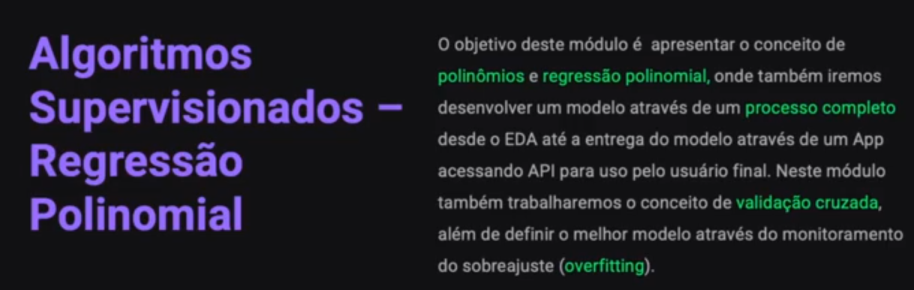

## 1.2 - Introdução a Polinômio

- Um polinômio é uma expressão matemática que consiste na soma de termos, cada um com variáveis elevadas a expoentes inteiros e não negativos, multiplicados por coeficientes. 
- Explicamos como identificar os termos, coeficientes e expoentes em um polinômio. 
- Também mencionamos que o grau de um polinômio é determinado pelo maior expoente presente em seus termos. 
- Os polinômios são amplamente utilizados na matemática e nas ciências para modelar relações, resolver equações e descrever padrões numéricos. 
- Apresentamos exemplos gráficos de polinômios de grau 1 (uma reta), grau 2 (uma parábola) e grau 3 (um formato semelhante a um raio invertido). 
- Também mencionamos que o grau 2 é chamado de polinômio quadrático e o grau 3 é chamado de polinômio cúbico.

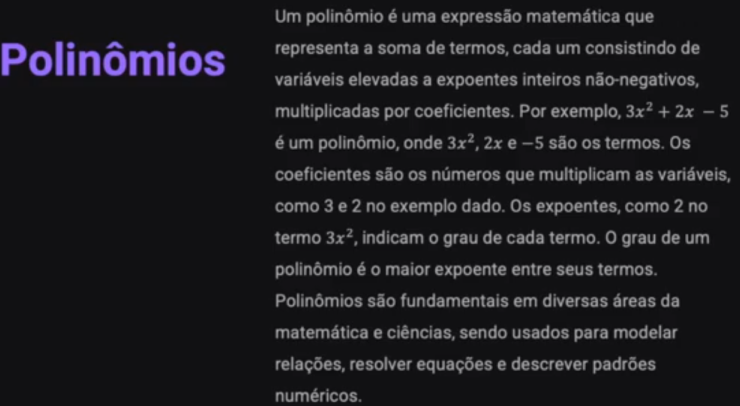

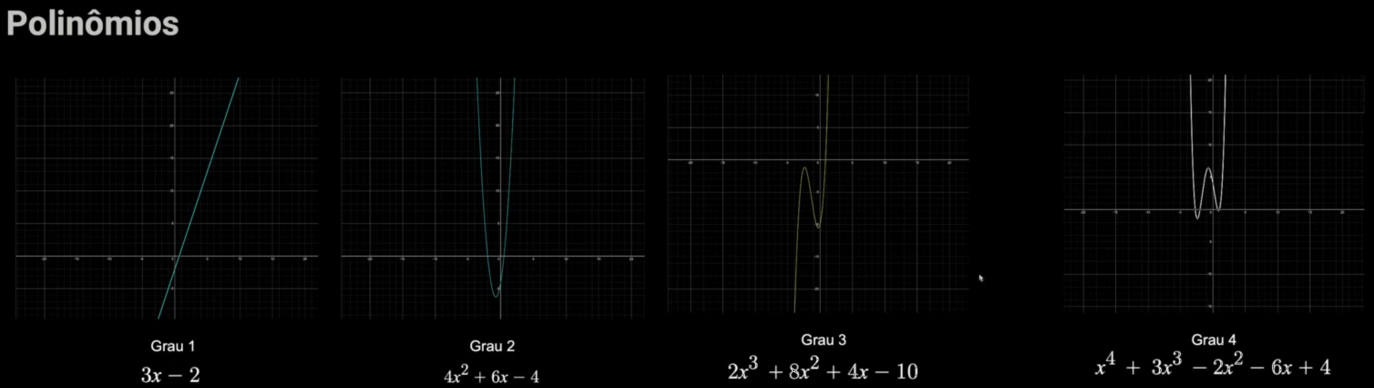

## 1.3 - Introdução a Regressão Polinomial
- Discutiremos sobre regressão polinomial e sua diferença em relação à regressão linear simples e múltipla. 
- Na regressão polinomial, utilizamos o mesmo algoritmo de regressão linear, <font color=yellow>porém criamos features polinomiais para treinar o modelo. Essas features são potências da variável independente, como X ao quadrado ou X ao cubo.</font> 
- <u>O objetivo é capturar o padrão e a curva dos dados de forma mais precisa.</u> 
- Mostramos também a diferença na equação da regressão linear simples e polinomial, onde na polinomial temos coeficientes multiplicados por potências da variável. 
- Por fim, destacamos que a regressão polinomial permite ajustar um modelo mais complexo, mas também pode resultar em erros quadráticos maiores.

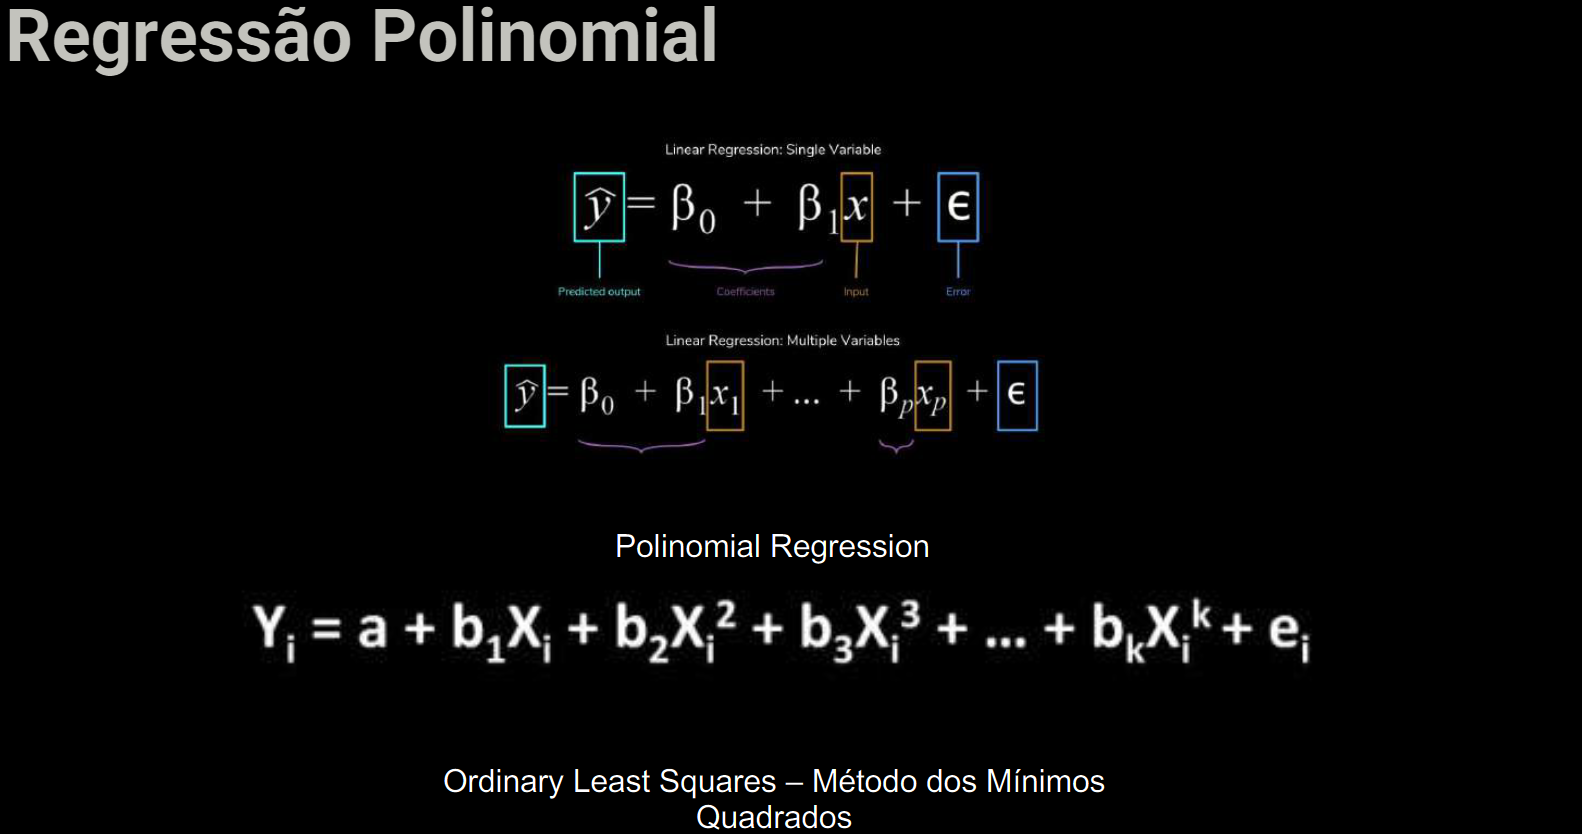

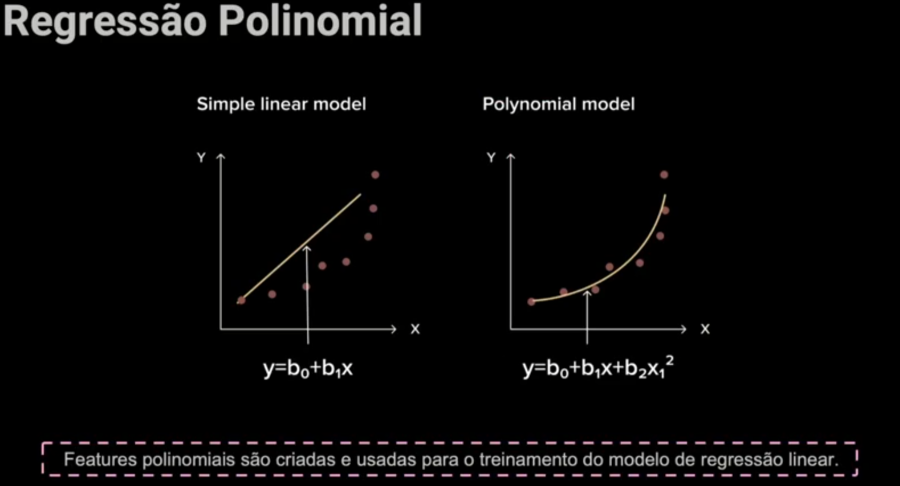

# 2 - Apresentação do Projeto
- O objetivo é prever o salário de um profissional com base no tempo de casa e no nível profissional. 
- Vamos utilizar o conceito de validação cruzada para preparar o dataset e treinar e validar o modelo duas vezes. 
- Primeiro, <u>vamos testar se uma regressão linear se ajusta bem aos dados.</u> Caso contrário, vamos utilizar uma <u>regressão polinomial.</u> 
- Também vamos realizar uma validação de overfitting para garantir que o modelo generalize bem.
- Vamos dividir o dataset em conjuntos e fazer iterações para treinamento e teste.

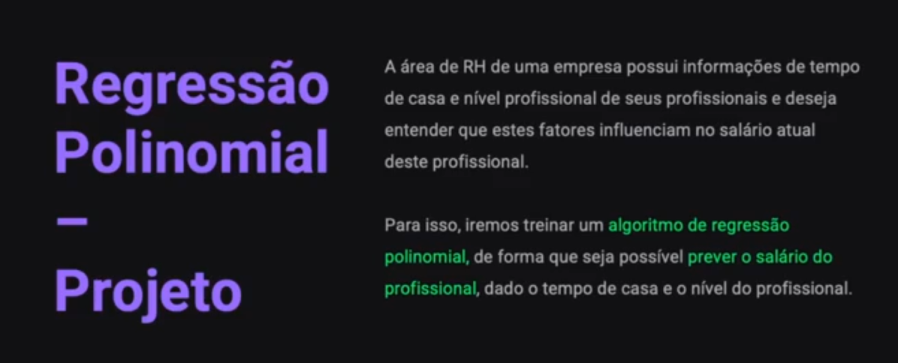

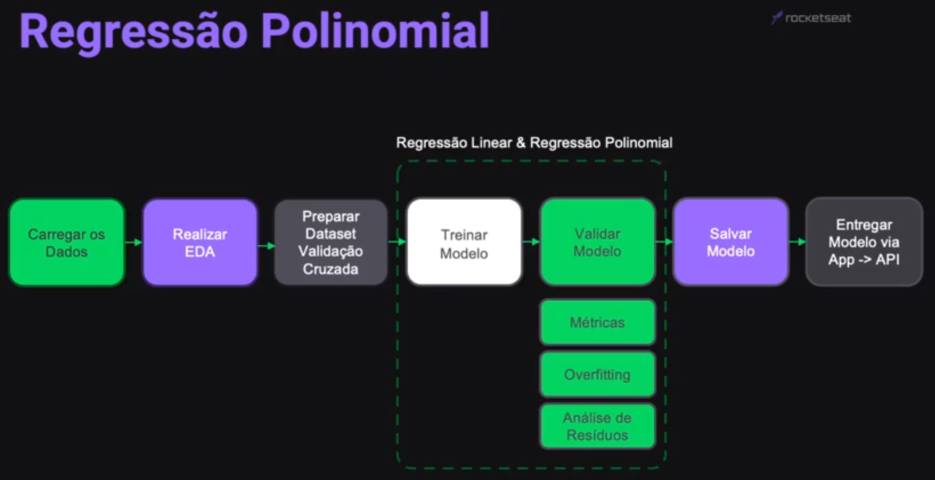

# 3 - Análise Exploratória de Dados

## 3.1 - Importação Bibliotecas

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, root_mean_squared_error
from scipy.stats import zscore, shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
import pingouin as pg
import joblib
from pydantic import BaseModel
from fastapi import FastAPI
import uvicorn

## 3.2 - Carga dos Dados
- Vamos analisar um arquivo CSV que contém informações sobre salários de funcionários de uma empresa. 
- O arquivo possui três colunas: tempo na empresa, nível na empresa e salário em reais. 
- Vamos importar as bibliotecas necessárias e inspecionar a estrutura do DataFrame. 
- Observamos que o arquivo possui mil entradas, representando mil funcionários. Não há valores ausentes e os tipos de dados foram corretamente capturados. O tempo na empresa é dado em meses e o nível na empresa varia de 1 a 10. 
- Vamos fazer cópias do DataFrame para realizar a análise exploratória e o bucketing, que é uma análise baseada em agrupamentos numéricos.

In [55]:
# Carregar dataset
df_salario = pd.read_csv('dataset_salario.csv')
df_salario.head(3)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73


In [56]:
# Inspancionar a estrutura do dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


### 3.2.1 - Cópia do Df Original para DF EDA e DF Bucketing

In [57]:
# Copiar Data Frame para DataFrame EDA
df_salario_eda = df_salario.copy()

In [58]:
# Copiar Data Frame para Data Frame Bucketing
df_salario_bucketing = df_salario.copy()

## 3.3 - Medidas Estatísticas e Análise Gráfica BoxPlot
 - Extraíremos as medidas estatísticas do dataframe para avaliar a estrutura dos dados. 
 - Observaremos que a variável "tempo na empresa" varia de 1 a 120 meses, a variável "nível na empresa" varia de 1 a 10 e a variável "salário em reais" varia de R$ 538,56 a R$ 18.000. 
 - Notamos que a média do salário é de R$ 5.000, mas a mediana é de R$ 3.237, indicando uma possível distribuição não normal. 
 - Em seguida, verificamos a presença de outliers por meio de boxplots e identificamos alguns outliers na variável "salário em reais". No entanto, decidimos não removê-los, pois foram considerados corretos pelo especialista do negócio.

In [59]:
# Extraindo Medidas Estatísticas
df_salario_eda.describe().round(2)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.00,1000.00,1000.00
mean,59.71,5.47,5093.73
std,34.03,2.89,4536.17
min,1.00,1.00,538.56
25%,30.75,3.00,1537.48
50%,60.00,6.00,3237.92
75%,89.00,8.00,7436.68
max,120.00,10.00,18923.23


<Axes: xlabel='tempo_na_empresa'>

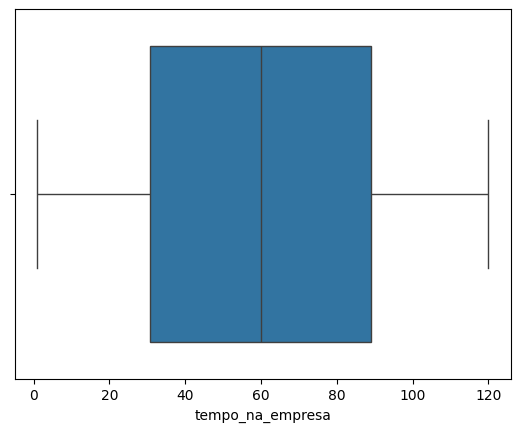

In [60]:
# Detectar Outliers - Tempo na Empresa
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

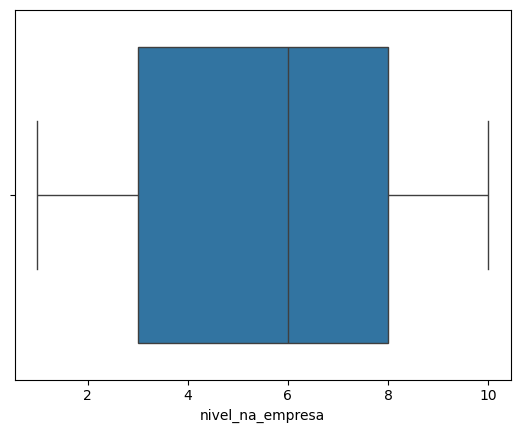

In [61]:
# Detectar Outliers - Nível na Empresa
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

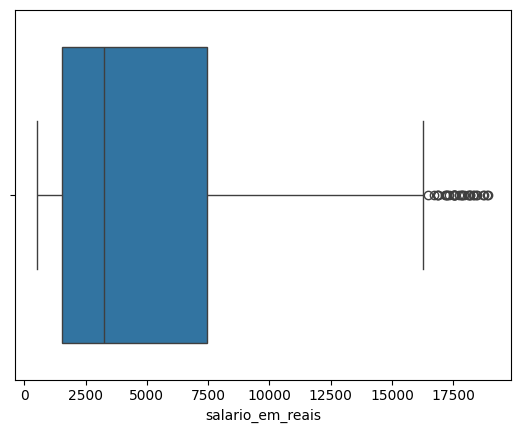

In [62]:
# Detectar Outliers - TSalário
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

## 3.4 - Análise Gráfica Scatterplot e Histogramas
- Continuamos nossa análise exploratória de dados, <font color=pink>focando no cruzamento das variáveis numéricas com o tempo na empresa.</font> 
- Utilizamos o gráfico de scatter plot para identificar padrões entre essas variáveis. 
- Observamos que a relação entre tempo na empresa e salário em reais não é linear, mas sim curva. Para lidar com essa situação, introduzimos o modelo de regressão polinomial. 
- Também cruzamos a variável nível na empresa, que é quase categórica, e notamos que não há um padrão definido. 
- Além disso, fizemos o cruzamento entre nível na empresa e tempo na empresa, e novamente não encontramos um padrão claro. 
- Por fim, utilizamos o diagrama de per-plot para visualizar os histogramas das variáveis e concluímos que há uma relação forte entre tempo na empresa e salário em reais, mas não linear. 
- Não encontramos correlações visíveis entre as variáveis.

### 3.4.1 - Cruzamentos Variável Independente (X) x Variável Dependente (y)

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

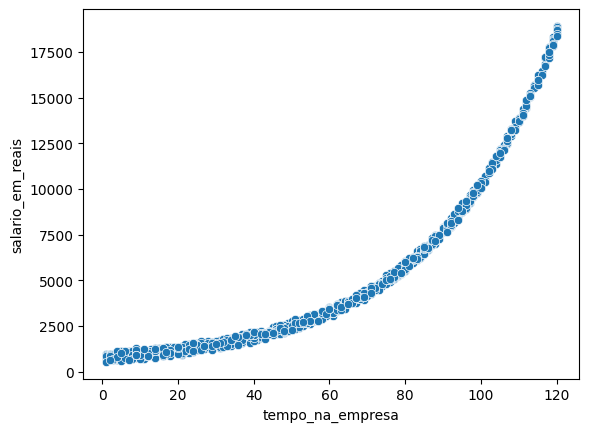

In [63]:
# Tempo na Empresa x Salário
sns.scatterplot(data = df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

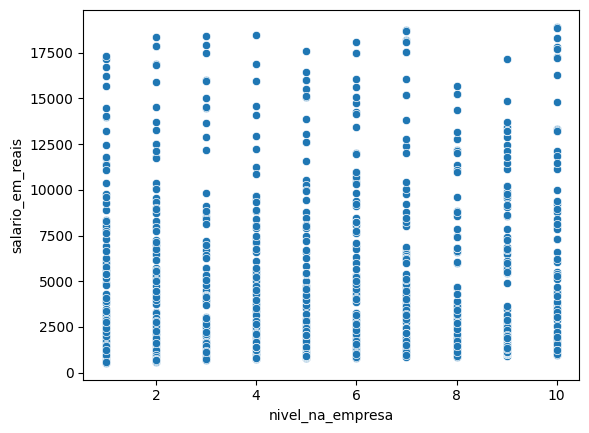

In [64]:
# Nível na Empresa x Salário
sns.scatterplot(data = df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

### 3.4.2 - Cruzamentos Entre as Variáveis Independentes (X)

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

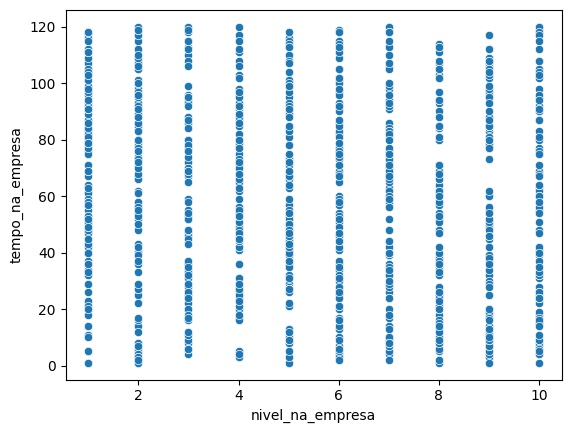

In [65]:
# Tempo na Empresa X Nível na Empresa
sns.scatterplot(data = df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

### 3.4.3 - Histograma

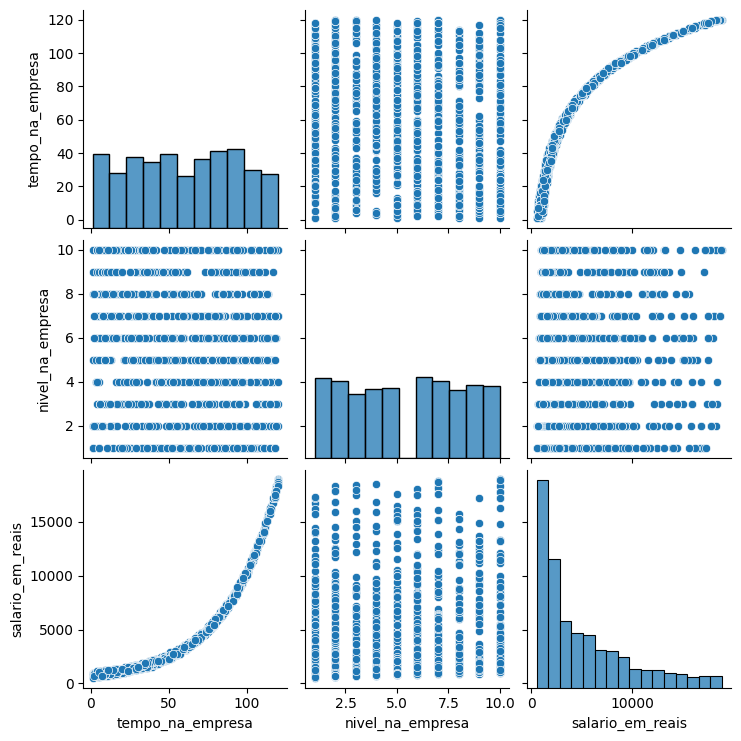

In [66]:
sns.pairplot(df_salario_eda)

## 3.5 - Análise de Correlação
- Vamos criar um diagrama de correlação usando um mapa de calor. 
- Usaremos o método heatmap e o valor padrão de correlação de Pearson. Observamos que a correlação entre o nível da empresa e o tempo da empresa é fraca, assim como a correlação entre o nível da empresa e o salário em reais. No entanto, a correlação entre o tempo da empresa e o salário em reais é de 0.91, indicando uma correlação forte. 
- Em seguida, exploramos a correlação de Spearman, que captura correlações não lineares. Ao usar Spearman, a correlação entre o tempo da empresa e o salário em reais aumenta para 1, indicando uma correlação quase perfeita e positiva. Isso sugere que essas variáveis podem estar relacionadas de forma não linear. 
- Também criamos um gráfico de formato de ranking, que mostra a ordem das correlações de forma descendente. Observamos que o nível da empresa tem uma correlação muito baixa com o salário em reais, enquanto o tempo da empresa tem uma contribuição significativa.

In [67]:
# Verificar Correlação - Pearson
#sns.heatmap(df_salario.corr('pearson'), annot=True)
df_salario.corr('pearson').round(2)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
tempo_na_empresa,1.00,-0.08,0.91
nivel_na_empresa,-0.08,1.00,-0.01
salario_em_reais,0.91,-0.01,1.00


In [68]:
# Verificar Correlação - Spearman: Captura correlações Não Lineares
#sns.heatmap(df_salario.corr('pearson'), annot=True)
df_salario.corr('spearman').round(2)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
tempo_na_empresa,1.00,-0.08,1.00
nivel_na_empresa,-0.08,1.00,-0.02
salario_em_reais,1.00,-0.02,1.00


<Axes: >

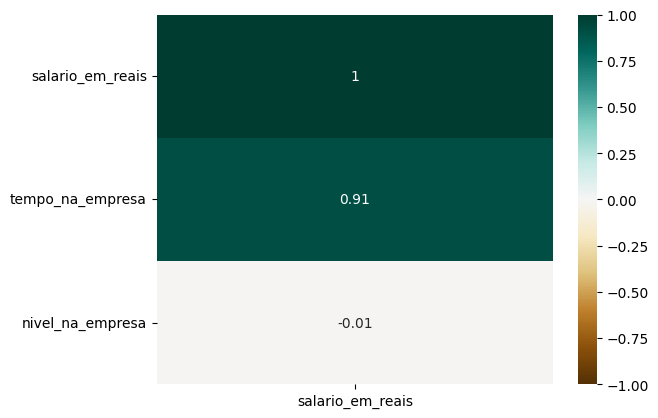

In [69]:
# Formato de Ranking, somente a correlação com a variável Target (Salario) - Pearson
sns.heatmap(df_salario_eda.corr('pearson')[['salario_em_reais']].round(2).sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<Axes: >

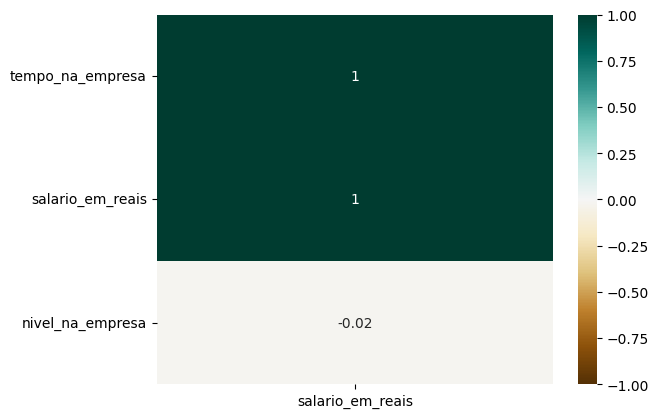

In [70]:
# Formato de Ranking, somente a correlação com a variável Target (Salario) - Spearman
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].round(2).sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## 3.6 - Análise Gráfica - Bucketing
- Concluiremos nossa análise exploratória de dados utilizando o método de bucketing. 
- Utilizamos a variável "tempo de casa" para agrupar os dados em faixas, já que essa variável possui uma ampla gama de valores. 
- Criamos os buckets com intervalos de 10 em 10 anos, de 0 a 120. 
- Em seguida, utilizamos a função cut do pandas para cortar os dados de acordo com esses buckets. 
- Em seguida, plotamos um boxplot para analisar a relação entre o tempo de casa e o salário. 
- Observamos que, assim como no gráfico de dispersão, há uma tendência de aumento do salário conforme o tempo de casa aumenta, mas não segue uma relação linear. 

### 3.6.1 - Bucketing Tempo na Empresa

In [71]:
# Extraindo Medidas Estatísticas de Tempo na Empresa
df_salario_bucketing.tempo_na_empresa.describe().round(2)

count    1000.00
mean       59.71
std        34.03
min         1.00
25%        30.75
50%        60.00
75%        89.00
max       120.00
Name: tempo_na_empresa, dtype: float64

In [72]:
# Bucketing Tempo na Empresa
bins_tempo_na_empresa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels_tempo_na_empresa = ['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
df_salario_bucketing['escala_tempo_na_empresa'] = pd.cut(x=df_salario_bucketing.tempo_na_empresa, bins=bins_tempo_na_empresa, labels=labels_tempo_na_empresa, include_lowest=True)

In [73]:
df_salario_bucketing.tail()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo_na_empresa
995,5,10,1037.35,00-09
996,7,2,668.01,00-09
997,118,6,17511.13,110-119
998,94,10,8938.96,90-99
999,11,10,1231.86,10-19


<Axes: xlabel='escala_tempo_na_empresa', ylabel='salario_em_reais'>

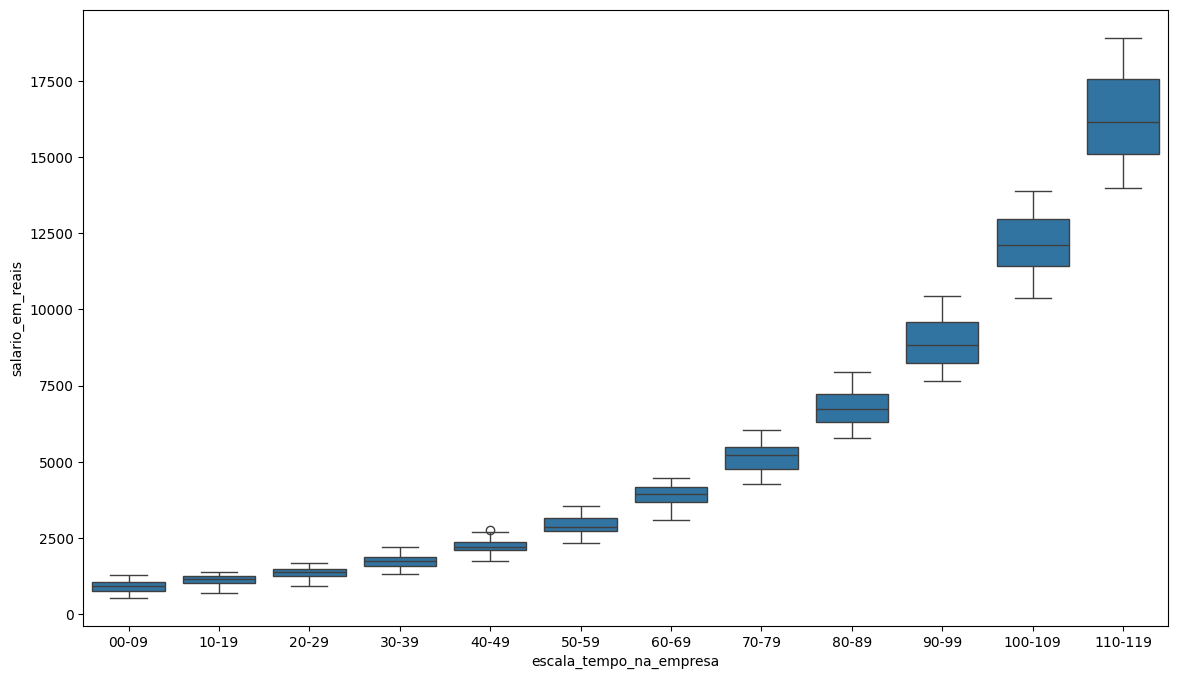

In [74]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo_na_empresa', y='salario_em_reais')

# 4 - Treinamento do Modelo - Regressão Linear

## 4.1 - Divisão dos Dados com KFold (Para Validação Cruzada)
- Vamos aprender sobre a divisão dos dados para treinamento de um modelo linear. Em vez de usar a abordagem tradicional de dividir os dados em treino e teste, vamos utilizar a validação cruzada. 
- Usando o KFold Vamos dividir os dados em 5 partes(splits) e treinar o modelo 5 vezes, usando uma parte como teste e as outras 4 como treino. 
- <font color=pink>Isso nos permitirá coletar métricas e monitorar o overfitting.</font>

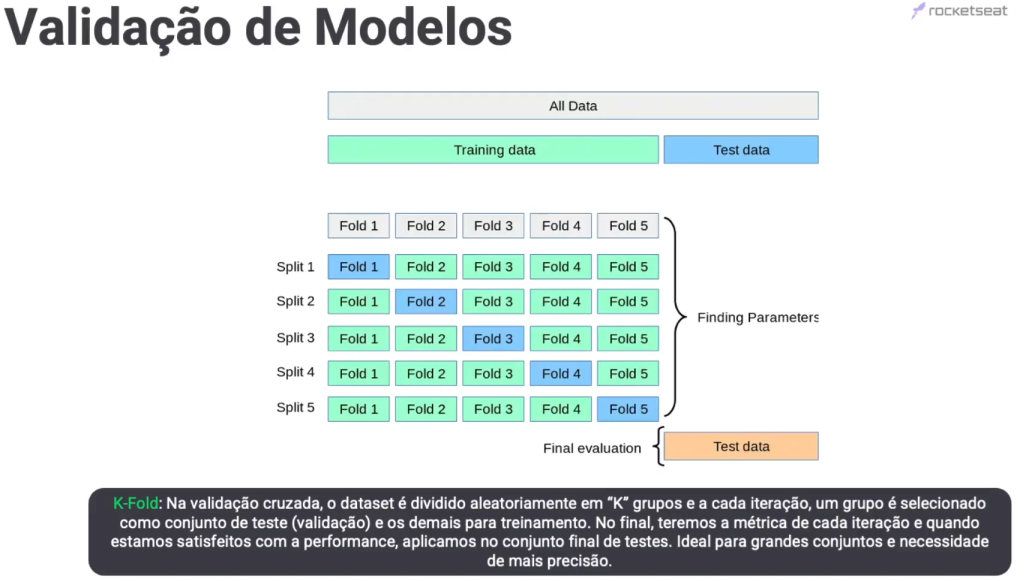

### 4.1.1 - Treinar Modelo Linear

In [75]:
# Criar dataset de Treino e Test
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario.salario_em_reais

In [76]:
# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=39)

## 4.2 - Estrutura do Pipeline - Modelo de Regressão Linear
- Vamos aprender a usar o Column Transformer para realizar transformações em colunas específicas de um conjunto de dados. 
- Vamos criar um Column Transformer para aplicar uma transformação em colunas numéricas, utilizando o StandardScaler. 
- Em seguida, vamos criar um Pipeline principal, que irá envolver o pré-processamento e o treinamento do modelo de regressão linear. 
- Vamos utilizar o Column Transformer como pré-processador e o Linear Regression como modelo. 
- Após isso, vamos partir para a parte de treinamento interativo, onde faremos ações em cima das K-folds.<br><br>
<font color=lightgreen>Organização do pipeline</font>
1. Nomes das Colunas
2. Transformação dos Dados Numéricos
3. Préprocessamento
4. Pipeline Principal = Pré processamento + Treinamento
5. Treinar Modelo<br><br>
<font color=yellow>O que o Pipeline do Sklearn faz: 'Pesquisar mais sobre esse assunto'</font>
1.  Treina o transformador no conjunto de testes
2. Depois transforma no conjunto de treino e depois no conjunto de teste, ele não faz um fit(treino e teste) nos dois conjuntos, ou seja, treina em um conjunto e aplica no outro, dessa forma não vaza os dados.

In [77]:
# Nome das Colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

In [78]:
# Transformer para Colunas Numéricas igual feito no EDA, mas usando o Pipeline
transformer_numericas = Pipeline(steps=[(
    'scaler', StandardScaler())
])

In [79]:
# Preprocessador, que encapsula o transformer anterior, onde fará parte do pipeline geral que treinará o modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

In [80]:
# Pipeline Principal = Pré processamento + Treinamento
model_regression = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

## 4.3 - Explicação sobre KFold e For Loop
- Vamos começar a <u>treinar o modelo de forma iterativa,</u> usando as divisões feitas anteriormente. 
- Vamos armazenar as métricas de treino e teste em uma lista para calcular a média no final. 
- Para verificar se o modelo está sofrendo de overfitting, vamos comparar o erro no treino e no teste. 
- Se o erro no teste for muito maior, indica que o modelo não está generalizando bem. 
- Vamos armazenar essas métricas em uma lista e também as predições para análise dos resíduos. 
- Faremos iterações usando o objeto KFolds para dividir os dados em treino e teste.

In [81]:
# Armazenar RMSE Treino e Teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
# Como o valor de R2 Score é (0 a 1), pode ser que eles fiquem muito próximos e a gente não consiga preceber se ocorreu overfitting
r2score_fold_test = []

# Armazenar Resíduos
residuos = []

# Armazenar Predições
y_pred_total = []

## 4.4 - Construção do Loop de Treinamento - Regressão Linear
- Discutiremos sobre overfitting e como calcular métricas de avaliação do modelo. 
- O overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar para dados não vistos durante o treinamento. 
- Calculamos o RMSE (Root Mean Squared Error) para os conjuntos de treinamento e teste, além do R2score. 
- Também calculamos os resíduos, que são as diferenças entre os valores reais e as previsões do modelo. 
- Armazenamos essas métricas em variáveis para análises futuras.

In [82]:
# Treinando de forma iterativa
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treine o modeno no conjunto de treinamento
    model_regression.fit(X_train, y_train)
    
    # Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_regression.predict(X_train)
    y_test_pred = model_regression.predict(X_test)

    # Calcular o RMSE para os conjuntos de treinamento e teste
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Calcular o R2 Score para o conjunto de teste
    r2score_test = r2_score(y_test, y_test_pred)

    # Calcular Resíduos
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenar as métricas
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

# 5 - Validação do Modelo - Regressão Linear

## 5.1 - Análise de Métricas - Regressão Linear
- Veremos como armazenar os resíduos em uma lista e transformá-la em uma lista unidimensional usando o conceito de reshape. 
- Também transformaremos a lista de listas y_pred_total em uma lista unidimensional. 
- Em seguida, executaremos o código e analisamos as métricas do modelo linear, como RMSE e R2 score. 
- Observaremos que o RMSE de treinamento foi de R$1.862,00, o RMSE de teste foi de R$1.886,00 e a diferença percentual entre eles foi de 0.2%. 
- O R2 score de teste foi de 0.82, indicando um bom ajuste do modelo. 
- <font color=yellow>Conclusão:</font> Não parece haver um problema de overfitting, pois a diferença entre treinamento e teste é pequena.

In [83]:
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_test)
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

# Qual o percentual da diferença entre o RMSE de treino e RMSE de teste 
percentual_rmse_final = ((rmse_test_final - rmse_train_final)/rmse_train_final) * 100

In [84]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Diferença RMSE Treino e Teste: {percentual_rmse_final}')
print(f'% R2 Score Teste: {r2score_test_final}')

RMSE Treino: 1882.94488792121
RMSE Teste: 1888.5937208185483
% Diferença RMSE Treino e Teste: 0.299999906188153
% R2 Score Teste: 0.8322816180825302


## 5.2 - Análise Gráfica de Resíduos - Regressão Linear
- Vamos realizar a análise de resíduos do nosso modelo linear. 
- Primeiro, vamos transformar os resíduos na escala padrão usando o pacote SciPy. 
- Em seguida, vamos verificar a linearidade dos resíduos, que devem estar entre -2 e 2 na escala padrão. 
- Também vamos verificar graficamente a homoscedasticidade, ou seja, se os valores estão em torno de uma reta. Se os resíduos não seguirem esses padrões, indica que não há linearidade e homoscedasticidade. 
- Em seguida, vamos verificar se os resíduos seguem uma distribuição normal, usando o gráfico QQPlot. 
- Se os valores não estiverem alinhados com a reta vermelha e a reta de 45 graus, indica que os resíduos não seguem uma distribuição normal. Essa análise gráfica é um indicador inicial da qualidade do nosso modelo.

### 5.2.1 - Análise de Resíduos Modelo Linear

In [85]:
# Transformar Resíduos na Escala Padrão
# (X - media) / desvio_padrao
residuos_std = zscore(residuos)

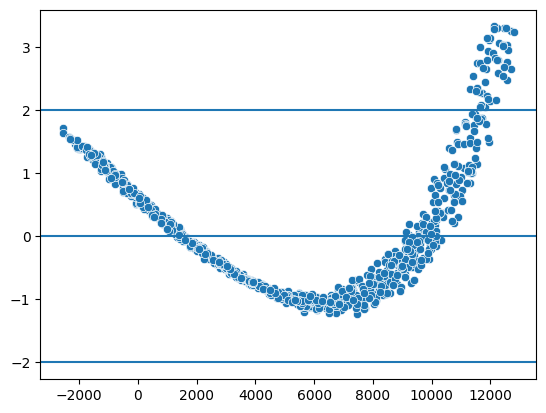

In [86]:
# Verificar a Linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homocedasticidade: valores em torno da reta
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=-2)
plt.axhline(y=0)
plt.axhline(y=2)
# Conclusão: Não há Linearidade e homodestacidade

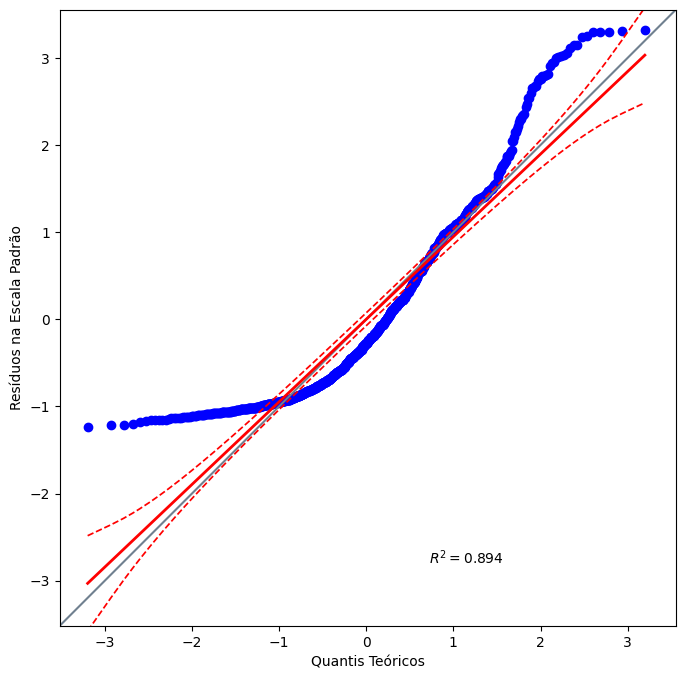

In [87]:
# Checar se Resíduos seguem uma distribuição normal
# QQ Plot
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na Escala Padrão')
plt.show()
# Gráficamente falando, não temos uma distribuição normal

## 5.3 -  Teste de Normalidade de Resíduos - Regressão Linear
- Continuaremos nossa análise de resíduos e começamos a trabalhar com testes estatísticos para validar se os resíduos seguem uma distribuição normal. 
- Utilizamos os testes de normalidade Shapiro-Wilk, Kolmogorov-Smirnov e Lilliefors. 
- Observamos que os resíduos <font color=red>não seguem uma distribuição normal, o que indica que o modelo de regressão linear utilizado pode não ser adequado para os dados.</font> -Portanto, é interessante considerar a utilização de modelos mais robustos e complexos.

### 5.3.1 - Teste de Normalidade - Shapiro-Wilk

In [88]:
# P-Valor = 8.13/-26. Pelo teste de Shapiro Wilk, rejeitamos o H0 e os resíduos não seguem uma distribuição normal'
stat_shapiro, p_valor_shapiro = shapiro(residuos)
print('Estatística do teste: {} e P-Valor: {}'.format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.8925794561956439 e P-Valor: 8.131222660631278e-26


### 5.3.2 - Teste de Normalidade Kolmogorov-Smirnov

In [89]:
# P-Valor = 0.0. Pelo teste de Shapiro Wilk, rejeitamos o H0 e os resíduos não seguem uma distribuição normal
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do teste: {} e P-Valor: {}'.format(stat_ks, p_valor_ks))

Estatística do teste: 0.592 e P-Valor: 0.0


### 5.3.3 - Teste de Normalidade Lilliefors

In [90]:
# P-Valor = 0.00099. Pelo teste de Lilliefors (P < 0.005), rejeitamos o H0 e os resíduos não seguem uma distribuição normal.
stat_ll, p_valor_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print('Estatística do teste: {} e P-Valor: {}'.format(stat_ll, p_valor_ll))

Estatística do teste: 0.117481323193939 e P-Valor: 0.0009999999999998899


# 6 - Treinamento do Modelo - Regressão Polinomial

## 6.1 - Features Polinomiais
- Veremos sobre a criação de <u>features polinomiais</u> para treinar um modelo de regressão linear. 
- Mostramos como utilizar a classe PolynomialFeatures do scikit-learn para gerar novas features com base nas features originais. 
- Explicamos que o parâmetro degree define o grau do polinômio desejado e o parâmetro include_bias indica se uma feature constante deve ser incluída. 
- Também demonstramos como obter os nomes das features geradas usando os métodos fit_transform da classe PolynomialFeatures. 

In [91]:
# Treinar modelo Polinomial
# degree =  grau do polinômio
# Feature constante que recebe 1, nesse caso não vamos precisar
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)

In [92]:
# Quais foram as features de entrada
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [93]:
# Quais foram as features de Saída
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

## 6.2 - Treinamento do Modelo Polinomial
- Faremos a criação de features polinomiais e como treinar um modelo polinomial usando validação cruzada. 
- Primeiro, discutimos a importância de avaliar o overfitting ao treinar modelos polinomiais com diferentes graus de polinômio. 
- Em seguida, adaptamos nosso código anterior para treinar o modelo polinomial em vários graus. 
- Criamos uma lista de graus de polinômio de 1 a 10 e iteramos sobre ela. Para cada grau, realizamos o processo de treinamento usando validação cruzada. 
- Armazenamos os valores de RMSE, R2 Score e percentual de erro para cada grau de polinômio. 
- No final, comparamos os resultados para determinar o grau de polinômio que obteve o melhor desempenho.<br><br>

O código abaixo realiza um ajuste de modelo de regressão polinomial em diferentes graus polinomiais para encontrar o grau ideal que não tenha overfitting e apresente um bom erro. Vamos ver como ele funciona passo a passo:

1. Ele define uma lista de graus polinomiais a serem testados, de 1 a 10.
2. Inicia listas vazias para armazenar métricas como RMSE (Root Mean Squared Error) para conjuntos de treinamento e teste, percentual de diferença entre RMSE de treinamento e teste, e R2 Score para o conjunto de teste.
3. Usa a técnica de validação cruzada KFold com 5 folds (pastas/splits) para dividir os dados.
4. Em seguida, para cada grau polinomial na lista graus_polynomial, o código executa o seguinte:
- Define as colunas numéricas a serem utilizadas no modelo.
- Configura um pré-processador usando um Pipeline que padroniza as colunas numéricas.
- Cria as features polinomiais usando a classe PolynomialFeatures.
- Configura um Pipeline principal que inclui o pré-processador, a criação de features polinomiais e o modelo de regressão linear.
5. Dentro do loop da validação cruzada:
6. Divide os dados em conjuntos de treinamento e teste.
7. Ajusta o modelo de regressão polinomial nos dados de treinamento.
8. Calcula as previsões nos conjuntos de treinamento e teste.
9. Calcula o RMSE nos conjuntos de treinamento e teste.
10. Calcula o R2 Score nos dados de teste.
11. Armazena as métricas calculadas para cada fold.
12. Calcula as médias das métricas (RMSE de treinamento, RMSE de teste e R2 Score de teste) para todos os folds.
13. Calcula o percentual da diferença entre o RMSE de teste e o RMSE de treinamento.
14. Armazena as métricas finais na lista correspondente.

In [94]:
# O modelo será treinado em um conjunto de graus, para sabermos, com base nas métricas, qual grau de polinômio ideal (Não tenha overfitting e tenha um bom erro)
graus_polynomial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=39)

for grau in graus_polynomial:
    # Nome das Colunas
    colunas_numericas = ['nivel_na_empresa', 'tempo_na_empresa']
    
    # Transformer para Colunas Numéricas igual feito no EDA, mas usando o Pipeline
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Preprocessador, que encapsula o transformer anterior, onde fará parte do pipeline geral que treinará o modelo
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
        ]
    )

    # Criar Features Polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Pipeline Principal = Pré processamento + Treinamento
    model_reg_poly = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('poly_features', poly_feat),
                                     ('regressor', LinearRegression())])

    # Armazenar RMSE Treino e Teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score de Teste
    # Como o valor de R2 Score é (0 a 1), pode ser que eles fiquem muito próximos e a gente não consiga preceber se ocorreu overfitting
    r2score_fold_test = []

    # Armazenar Resíduos
    residuos = []

    # Armazenar Predições
    y_pred_total = []
    
    # Treinando de forma iterativa
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treine o modeno no conjunto de treinamento
        model_reg_poly.fit(X_train, y_train)
        
        # Faça predições nos conjuntos de treinamento e teste
        y_train_pred = model_reg_poly.predict(X_train)
        y_test_pred = model_reg_poly.predict(X_test)

        # Calcular o RMSE para os conjuntos de treinamento e teste
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)

        # Calcular o R2 Score para o conjunto de teste
        r2score_test = r2_score(y_test, y_test_pred)

        # Calcular Resíduos
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenar as métricas
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)
    
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    
    # Qual o percentual da diferença entre o RMSE de treino e RMSE de teste 
    percentual_rmse_final = ((rmse_test_final - rmse_train_final)/rmse_train_final) * 100

    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)
    
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

## 6.3 - Análise Gráfica Overfitting
- Vamos analisar o percentual de diferença do RMSE (Root Mean Square Error) por grau do polinômio. 
- Observamos que a partir do grau 4, a diferença percentual entre o RMSE de treino e teste começa a subir vertiginosamente. 
- Isso indica que o uso de graus de polinômio muito altos pode levar ao overfitting e comprometer a generalização do modelo. 
- Concluímos que o modelo ideal é aquele que utiliza o grau de polinômio 4, pois ele estabiliza em termos de erro. 
- Agora podemos treinar o modelo e realizar análises de métricas e resíduos baseadas nesse modelo.

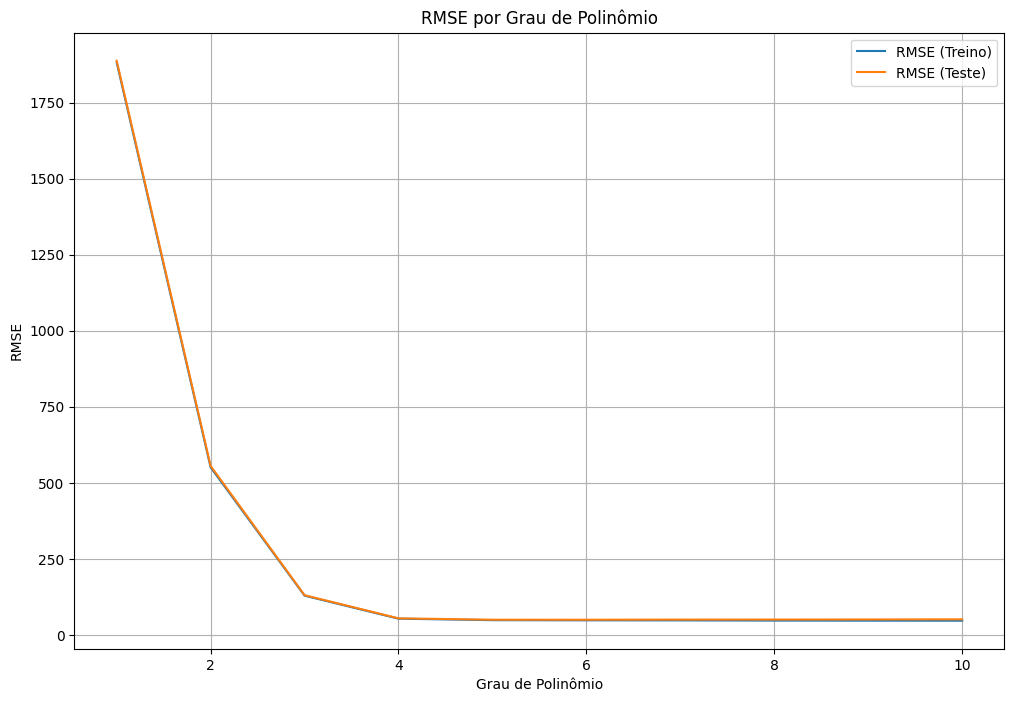

In [95]:
# Plotar Gráfico para Comparar RMSE por Grau de Polinômio
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau de Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau de Polinômio')
plt.legend()
plt.grid(True)
plt.show()

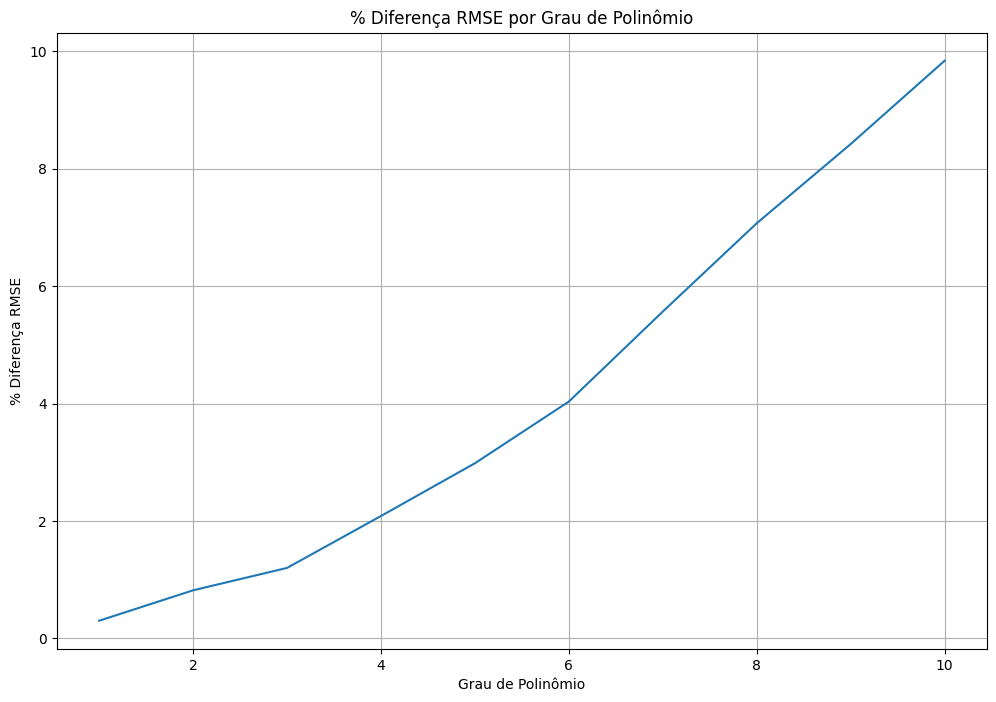

In [96]:
# Plotar Gráfico para Comparar % de Diferença RMSE (Treino e Teste)
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='% Diferença RMSE Treino e Teste')
plt.xlabel('Grau de Polinômio')
plt.ylabel('% Diferença RMSE')
plt.title('% Diferença RMSE por Grau de Polinômio')
plt.grid(True)
plt.show()

# 7 - Validação do Modelo - Regressão Polinomial

## 7.1 - Análise de Métricas - Modelo Polinomial
- Analisaremos agora as métricas do nosso modelo polinomial de grau 4 em comparação com o modelo linear. 
- Observamos que o modelo polinomial apresentou uma melhora significativa no RMSE, reduzindo o erro em cerca de 10% em relação ao menor valor de salário na base de dados. 
- Além disso, o R-score aumentou para 0.9998, indicando um bom ajuste do modelo. 
- Essas métricas mostram que o modelo polinomial é uma escolha melhor do que o modelo linear.

In [97]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Diferença RMSE Treino e Teste: {percentual_rmse_final}')
print(f'% R2 Score Teste: {r2score_test_final}')

RMSE Treino: 46.63917750845018
RMSE Teste: 51.22881801760669
% Diferença RMSE Treino e Teste: 9.840740669847682
% R2 Score Teste: 0.9998704173720974


# 7.2 - Análise de Resíduos - Modelo Polinomial
- Analisamos agora os resíduos do modelo polinomial e comparamos com a regressão linear. 
- Observamos que o modelo polinomial apresentou melhorias significativas em termos de linearidade e homoscedasticidade. 
- Também realizamos o teste de distribuição normal nos resíduos e constatamos que eles seguem uma distribuição normal, ao contrário do modelo de regressão linear. 
- Utilizamos diferentes testes, como Shapiro-Wilk e Kolmogorov-Smirnov, e concluímos que os resíduos do modelo polinomial se ajustam melhor aos dados. 
- Ao final da aula, resumimos que o modelo polinomial, com suas features polinomiais, apresentou métricas e análise de resíduos superiores ao modelo linear.

In [98]:
# Transformar Resíduos na Escala Padrão
# (X - media) / desvio_padrao
residuos_std = zscore(residuos)

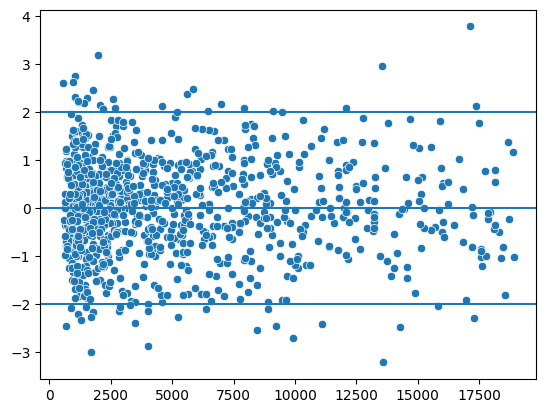

In [99]:
# Verificar a Linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homocedasticidade: valores em torno da reta
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=-2)
plt.axhline(y=0)
plt.axhline(y=2)
# Conclusão: Não há Linearidade e homodestacidade

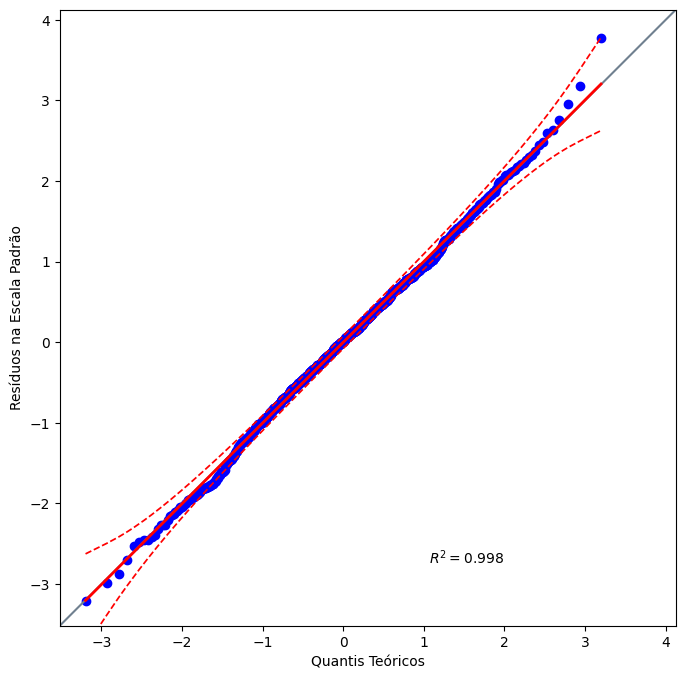

In [100]:
# Checar se Resíduos seguem uma distribuição normal
# QQ Plot
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na Escala Padrão')
plt.show()
# Gráficamente falando, não temos uma distribuição normal

In [101]:
# P-Valor = 0.48 Pelo teste de Shapiro Wilk, não rejeitamos o H0 e os resíduos seguem uma distribuição normal'
stat_shapiro, p_valor_shapiro = shapiro(residuos)
print('Estatística do teste: {} e P-Valor: {}'.format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.998393519765358 e P-Valor: 0.48705615383543455


In [102]:
# P-Valor = 6.55/-218. Pelo teste de Kolmogorov-Smirnov, rejeitamos o H0 e os resíduos não seguem uma distribuição normal
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do teste: {} e P-Valor: {}'.format(stat_ks, p_valor_ks))

Estatística do teste: 0.48582811392646896 e P-Valor: 6.399239355904474e-218


In [103]:
# P-Valor = 0.45. Pelo teste de Lilliefors (P > 0.005), não rejeitamos o H0 e os resíduos seguem uma distribuição normal.
stat_ll, p_valor_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print('Estatística do teste: {} e P-Valor: {}'.format(stat_ll, p_valor_ll))

Estatística do teste: 0.020623533404720118 e P-Valor: 0.46049670173121654


# 8 - Finalizando o Modelo

## 8.1 - Realizar Predição Individual e Salvar Modelo
 - Discutiremos a importância do tempo de serviço e do nível da empresa na determinação do salário. 
 - Fizemos algumas análises gráficas e observamos que o tempo de serviço é a variável mais importante. 
 - Em seguida, salvamos o modelo que criamos para poder utilizá-lo posteriormente. 
 - Agora, vamos nos preparar para fazer o deploy do modelo e entregá-lo aos usuários. 
 - Antes disso, realizamos uma predição individual usando o modelo que acabamos de criar.

In [104]:
# Consideramos uma pessoa com 6 anos de serviço e nível máximo na empresa, e a previsão foi de um salário de R$ 4880,31.
input_features = {
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 5
}

predicao_salario = pd.DataFrame(input_features, index=[1])

In [105]:
# Predição com modelo polinomial de grau 4
model_reg_poly.predict(predicao_salario)

array([5774.22425157])

In [106]:
# Salvar o modelo
joblib.dump(model_reg_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']

# 9 - Construindo a API
api_modelo_salario.py

## 9.1 - Construção da API do Modelo
vamos aprender como entregar um modelo de machine learning através de uma aplicação usando o Streamlit. Vamos criar uma API usando o FastAPI para receber os dados de entrada, carregar o modelo treinado e fazer a predição. Para isso, vamos importar as bibliotecas necessárias, criar uma instância do FastAPI, definir a classe para validação dos dados de entrada e criar a função de predição. Por fim, vamos decorar a função com o decorador do FastAPI para expor a função como uma API REST.

## 9.2 - Testando a API
abrimos o terminal e testamos a API que construímos usando o FastAPI. Subimos o servidor do Uvicorn para responder às chamadas da API. Utilizamos o Swagger para testar a API, onde definimos a estrutura da API e testamos com valores de entrada. Verificamos se os valores retornados estavam corretos. Agora, precisamos construir o front-end para interagir com a nossa API.

# 10 - Testando a Aplicação

## 10.1 - Formulário de Entrada
vamos preparar os dados para a API e construir a aplicação no Streamlit. Vamos importar o Streamlit, o módulo JSON e o módulo Requests. Em seguida, vamos criar um título para a aplicação e definir um formulário com as entradas do usuário, como a quantidade de meses e o nível do profissional. Usaremos um slider para permitir que o usuário selecione o número de meses e um input para o nível do profissional. Em seguida, criaremos um JSON com as informações do usuário e criaremos um botão para executar uma ação. Veremos mais detalhes sobre essa ação no próximo vídeo.<br><br><br>

O que Posso fazer com Streamlit<br><br>
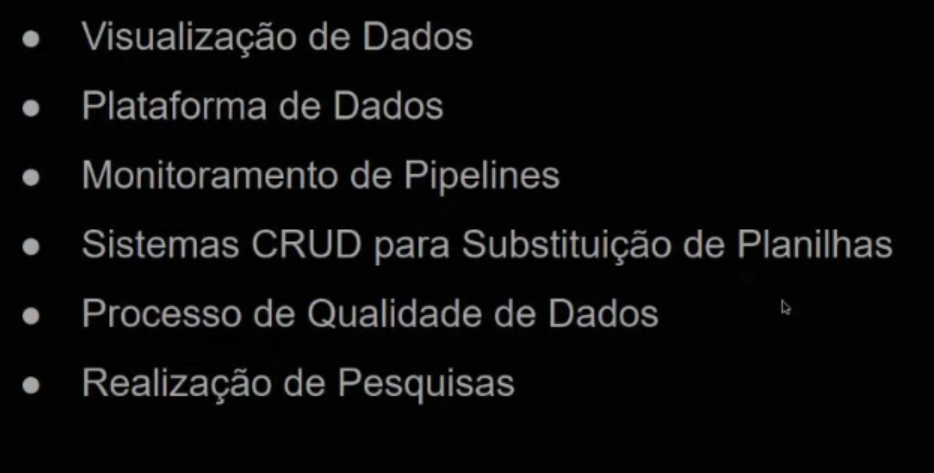

## 10.2 -  Botão
concluímos a primeira parte da nossa aplicação do Streamlit. Agora, precisamos criar um botão e definir a ação que esse botão irá executar. Vamos chamar uma API usando o módulo Requests e exibir o resultado na tela. Para capturar o evento do botão, utilizamos um if para verificar se o botão foi clicado. Em seguida, chamamos a API usando o método POST do Requests, passando a URL e os dados em formato JSON. O resultado é armazenado na variável REST e convertido para um dicionário JSON. Por fim, exibimos o valor do salário estimado na tela usando o st.subheader.